In [1]:
## checking numbers in the text

In [2]:
# import packages
import pandas as pd
from matplotlib import pyplot,patches
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cmocean
from scipy import stats


In [3]:
# import pkl files
wing_multi_df = pd.read_pickle('pkls/preMN_to_MN_wing_v840.pkl')
wing_synapses_df = pd.read_pickle('pkls/synapse_positions_wing_v840.pkl')
wing_properties_df = pd.read_pickle('pkls/mn_properties_wing_v840.pkl')

leg_typed_df = pd.read_pickle('pkls/leg_local_interseg_typed_012524.pkl')
leg_multi_df = pd.read_pickle('../../../Downloads/pre_to_mn_df_matched_typed_with_nt_20240117.pkl')
old_leg_df = pd.read_pickle('pkls/pre_to_mn_df_matched_typed_with_nt_v604_20230525.pkl')
leg_properties_df = pd.read_pickle('../../../Downloads/leg_MN_fixed_somas_051923.pkl')
leg_w_fragments_df = pd.read_pickle('../../../Downloads/pre_to_mn_df_pre_match_to_pool_w_fragments_20240129.pkl')

In [4]:
# X synapses from Y preMNs

print("Leg: {} synapses from {} preMNs".format(leg_multi_df.sum().sum(), len(leg_multi_df)))
print("v604 leg: {} synapses from {} preMNs".format(old_leg_df.sum().sum(), len(old_leg_df)))

print("Wing: {} synapses from {} preMNs".format(wing_multi_df.MN_syn_total.sum(), len(wing_multi_df)))


Leg: 212190 synapses from 1546 preMNs
v604 leg: 207991 synapses from 1460 preMNs
Wing: 144668 synapses from 1784 preMNs


In [5]:
## X synapses including fragments. fragments are Y% of the connectome

leg_w_frag = leg_w_fragments_df.sum().sum()
wing_w_frag = wing_properties_df.total_inputs.sum()

leg_frag_syn = leg_w_frag - leg_multi_df.sum().sum()
wing_frag_syn = wing_w_frag - wing_multi_df.MN_syn_total.sum()

print("Leg: {} fragment synapses are {}% of synapses".format(
leg_frag_syn, (leg_frag_syn/leg_w_frag)*100))
print("Wing: {} fragment synapses are {}% of synapses".format(
wing_frag_syn, (wing_frag_syn/wing_w_frag)*100))

Leg: 20344 fragment synapses are 8.748828128359724% of synapses
Wing: 11966 fragment synapses are 7.639465250201106% of synapses


In [6]:
## X synapses per MN on averages, Y preMNs per MN on average
flat_leg_multi = leg_multi_df.T.droplevel(['side','segment','function','muscle','rank','nerve']).T

NUM_wing_premns = wing_multi_df.astype(bool).sum(axis=0)[:-1]
NUM_leg_premns = flat_leg_multi.astype(bool).sum(axis=0)
NUM_all_premns = pd.concat([NUM_wing_premns, NUM_leg_premns])

NUM_wing_synapses = wing_multi_df.sum()[:-1]
NUM_leg_synapses = flat_leg_multi.sum()
NUM_all_synapses = pd.concat([NUM_wing_synapses,NUM_leg_synapses])

print("Wing: {} \u00B1 {} synapses from {} \u00B1 {} preMNs".format(
    np.round(np.mean(NUM_wing_synapses),2), np.round(np.std(NUM_wing_synapses),2), np.round(np.mean(NUM_wing_premns),2), np.round(np.std(NUM_wing_premns),2)))

print("Leg: {} \u00B1 {} synapses from {} \u00B1 {} preMNs".format(
    np.round(np.mean(NUM_leg_synapses),2), np.round(np.std(NUM_leg_synapses),2), np.round(np.mean(NUM_leg_premns),2), np.round(np.std(NUM_leg_premns),2)))

print("Both: {} \u00B1 {} synapses from {} \u00B1 {} preMNs".format(
    np.round(np.mean(NUM_all_synapses),2), np.round(np.std(NUM_all_synapses),2), np.round(np.mean(NUM_all_premns),2), np.round(np.std(NUM_all_premns),2)))


Wing: 4988.55 ± 2340.46 synapses from 251.34 ± 84.45 preMNs
Leg: 3075.22 ± 2597.76 synapses from 161.39 ± 90.66 preMNs
Both: 3641.41 ± 2671.16 synapses from 188.01 ± 97.89 preMNs


In [7]:
# each preMN synapses onto X MNs

leg_premns = flat_leg_multi.T.astype(bool).sum(axis=0).values
wing_premns = wing_multi_df.T.astype(bool).sum(axis=0).values

print("Wing: {} \u00B1 {} MNs per preMN".format(np.round(np.mean(wing_premns),2), np.round(np.std(wing_premns),2)))
print("Leg: {} \u00B1 {} MNs per preMN".format(np.round(np.mean(leg_premns),2), np.round(np.std(leg_premns),2)))
print("Both: {} \u00B1 {} MNs per preMN".format(np.round(np.mean(np.concatenate([wing_premns,leg_premns])),2), np.round(np.std(np.concatenate([wing_premns,leg_premns])),2)))


Wing: 5.09 ± 3.08 MNs per preMN
Leg: 7.2 ± 7.41 MNs per preMN
Both: 6.07 ± 5.63 MNs per preMN


In [8]:
## update leg_properties_df input synapse count to include fragments/updated materialization 


In [9]:
flat_leg_frag = leg_w_fragments_df.T.droplevel(['side','segment','function','muscle','rank','nerve']).T
id_and_frag = pd.DataFrame(flat_leg_frag.sum().rename_axis('pt_root_id').reset_index(name='total_inputs'))

In [11]:
# MN synapses per surface area

leg_slope, intercept, leg_r, leg_p, leg_std_err = stats.linregress(leg_properties_df.total_area_fixed_um, leg_properties_df.input_syn_count)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(wing_properties_df.total_area_fixed_um, wing_properties_df.total_inputs)

print("Leg: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(leg_slope,2), np.round(leg_std_err,2), np.round(leg_r,2), leg_p))

print("All Wing: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))

#####
indir_df = wing_properties_df[wing_properties_df.cell_type.str.startswith('D')].reset_index(drop=True)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(indir_df.total_area_fixed_um, indir_df.total_inputs)
print("Wing indirect: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))

tens_df = wing_properties_df[wing_properties_df.cell_type.str.startswith(('P','d','t'), na=False)].reset_index(drop=True)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(tens_df.total_area_fixed_um, tens_df.total_inputs)
print("Wing tension: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))

direct_df = wing_properties_df[wing_properties_df.cell_type.str.startswith(('i','iii','hg','b'), na=False)].reset_index(drop=True)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(direct_df.total_area_fixed_um, direct_df.total_inputs)
print("Wing direct: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))

direct_df = wing_properties_df[wing_properties_df.cell_type.str.startswith(('i','iii','hg','b2','b3'), na=False)].reset_index(drop=True)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(direct_df.total_area_fixed_um, direct_df.total_inputs)
print("Wing, no b1: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))

direct_tens_df = wing_properties_df[wing_properties_df.cell_type.str.startswith(('i','iii','hg','b2','b3','tp','P', 'd'), na=False)].reset_index(drop=True)
wing_slope, intercept, wing_r, wing_p, wing_std_err = stats.linregress(direct_df.total_area_fixed_um, direct_df.total_inputs)
print("direct+tension, no b1: {} \u00B1 {} synapses per um\u00b2; r = {}, p = {}".format(
    np.round(wing_slope,2), np.round(wing_std_err,2), np.round(wing_r,2), wing_p))
print(len(direct_tens_df)) # should be 12+5-1=16

Leg: 0.44 ± 0.02 synapses per um²; r = 0.91, p = 1.599309057313202e-55
All Wing: 0.22 ± 0.04 synapses per um²; r = 0.71, p = 1.6020377958066753e-05
Wing indirect: 0.24 ± 0.02 synapses per um²; r = 0.98, p = 4.094391038469795e-08
Wing tension: 0.59 ± 0.07 synapses per um²; r = 0.98, p = 0.003783934743628032
Wing direct: 0.09 ± 0.08 synapses per um²; r = 0.34, p = 0.2785120379281504
Wing, no b1: 0.41 ± 0.07 synapses per um²; r = 0.9, p = 0.00015761763067454815
direct+tension, no b1: 0.41 ± 0.07 synapses per um²; r = 0.9, p = 0.00015761763067454815
16


In [82]:
## % of synapses from each cell class (DNs)

wing_dn_synapses = wing_multi_df[wing_multi_df.index.get_level_values(level='classification_system').isin(['descending'])].sum()[:-1]
leg_dn_synapses = flat_leg_multi[flat_leg_multi.index.get_level_values(level='cell_class').isin(['descending'])].sum()

both_dn_synapses = pd.concat([wing_dn_synapses,leg_dn_synapses])
both_all_synapses = pd.concat([NUM_wing_synapses,NUM_leg_synapses])

print("Wing: {}% \u00B1 {}% synapses from DNs".format(
    np.round(np.mean(wing_dn_synapses/NUM_wing_synapses)*100,3), np.round(np.std(wing_dn_synapses/NUM_wing_synapses)*100,2)))

print("Leg: {}% \u00B1 {}% synapses from DNs".format(
    np.round(np.mean(leg_dn_synapses/NUM_leg_synapses)*100,3), np.round(np.std(leg_dn_synapses/NUM_leg_synapses)*100,2)))

print("Both: {}% \u00B1 {}% synapses from DNs".format(
    np.round(np.mean(both_dn_synapses/both_all_synapses)*100,3), np.round(np.std(both_dn_synapses/both_all_synapses)*100,2)))


Wing: 11.181% ± 6.51% synapses from DNs
Leg: 9.055% ± 4.19% synapses from DNs
Both: 9.684% ± 5.09% synapses from DNs


In [89]:
## % of synapses from each cell class (Non-local)

wing_nonl_synapses = wing_multi_df[~wing_multi_df.index.get_level_values(level='classification_system').isin(['local'])].sum()[:-1]
leg_nonl_synapses = flat_leg_multi[~flat_leg_multi.index.get_level_values(level='cell_class').isin(['local'])].sum()

both_nonl_synapses = pd.concat([wing_nonl_synapses,leg_nonl_synapses])

print("Wing: {}% \u00B1 {}% synapses from non local".format(
    np.round(np.mean(wing_nonl_synapses/NUM_wing_synapses),3)*100, np.round(np.std(wing_nonl_synapses/NUM_wing_synapses),2)*100))

print("Leg: {}% \u00B1 {}% synapses from non local".format(
    np.round(np.mean(leg_nonl_synapses/NUM_leg_synapses),3)*100, np.round(np.std(leg_nonl_synapses/NUM_leg_synapses),2)*100))

print("Both: {}% \u00B1 {}% synapses from non local".format(
    np.round(np.mean(both_nonl_synapses/both_all_synapses),3)*100, np.round(np.std(both_nonl_synapses/both_all_synapses),2)*100))


Wing: 39.4% ± 8.0% synapses from non local
Leg: 31.3% ± 9.0% synapses from non local
Both: 33.7% ± 10.0% synapses from non local


In [95]:
## % of neurons from each cell class (Non-local)

wing_nonl_neurons = wing_multi_df[~wing_multi_df.index.get_level_values(level='classification_system').isin(['local'])].astype(bool).sum(axis=0).values[:-1]
leg_nonl_neurons = flat_leg_multi[~flat_leg_multi.index.get_level_values(level='cell_class').isin(['local'])].astype(bool).sum(axis=0).values

wing_all_neurons = wing_multi_df.astype(bool).sum(axis=0).values[:-1]
leg_all_neurons = flat_leg_multi.astype(bool).sum(axis=0).values

both_nonl_neurons = np.concatenate([wing_nonl_neurons,leg_nonl_neurons])
both_all_neurons = np.concatenate([wing_all_neurons,leg_all_neurons])

print("Wing: {}% \u00B1 {}% neurons from non local".format(
    np.round(np.mean(wing_nonl_neurons/wing_all_neurons),3)*100, np.round(np.std(wing_nonl_neurons/wing_all_neurons),2)*100))

print("Leg: {}% \u00B1 {}% neurons from non local".format(
    np.round(np.mean(leg_nonl_neurons/leg_all_neurons),3)*100, np.round(np.std(leg_nonl_neurons/leg_all_neurons),2)*100))

print("Both: {}% \u00B1 {}% neurons from non local".format(
    np.round(np.mean(both_nonl_neurons/both_all_neurons),3)*100, np.round(np.std(both_nonl_neurons/both_all_neurons),2)*100))

Wing: 44.0% ± 6.0% neurons from non local
Leg: 40.2% ± 10.0% neurons from non local
Both: 41.3% ± 9.0% neurons from non local


In [453]:
# leg synapses/neurons per class quantifications

leg_local_df = flat_leg_multi[flat_leg_multi.index.get_level_values(level='cell_class').isin(['local'])]
leg_interseg_df = flat_leg_multi[flat_leg_multi.index.get_level_values(level='cell_class').isin(['intersegmental'])]
leg_desc_df = flat_leg_multi[flat_leg_multi.index.get_level_values(level='cell_class').isin(['descending'])]

# # per MN
# print("Leg Local: {}% \u00B1 {}% neurons, {}% \u00B1 {}% synapses".format(
#     np.round(np.mean(leg_local_df.astype(bool).sum(axis=0).values/leg_all_neurons),3)*100, np.round(np.std(leg_local_df.astype(bool).sum(axis=0).values/leg_all_neurons),2)*100,
#     np.round(np.mean(leg_local_df.sum()/NUM_leg_synapses),3)*100, np.round(np.std(leg_local_df.sum()/NUM_leg_synapses),2)*100,))

# print("Leg Intersegmental: {}% \u00B1 {}% neurons, {}% \u00B1 {} synapses".format(
#     np.round(np.mean(leg_interseg_df.astype(bool).sum(axis=0).values/leg_all_neurons),3)*100, np.round(np.std(leg_interseg_df.astype(bool).sum(axis=0).values/leg_all_neurons),2)*100,
#     np.round(np.mean(leg_interseg_df.sum()/NUM_leg_synapses),3)*100, np.round(np.std(leg_interseg_df.sum()/NUM_leg_synapses),2)*100,))

# print("Leg Descending: {}% \u00B1 {}% neurons, {}% \u00B1 {}% synapses".format(
#     np.round(np.mean(leg_desc_df.astype(bool).sum(axis=0).values/leg_all_neurons),3)*100, np.round(np.std(leg_desc_df.astype(bool).sum(axis=0).values/leg_all_neurons),2)*100,
#     np.round(np.mean(leg_desc_df.sum()/NUM_leg_synapses),3)*100, np.round(np.std(leg_desc_df.sum()/NUM_leg_synapses),2)*100,))

# as a whole
print("Leg Local: {}% of neurons, {}% of synapses".format(
    np.round(len(leg_local_df)/len(flat_leg_multi),3)*100, np.round(leg_local_df.sum().sum()/flat_leg_multi.sum().sum(),3)*100))
print("Leg Intersegmental: {}% of neurons, {}% of synapses".format(
    np.round(len(leg_interseg_df)/len(flat_leg_multi),3)*100, np.round(leg_interseg_df.sum().sum()/flat_leg_multi.sum().sum(),3)*100))
print("Leg Descending: {}% of neurons, {}% of synapses".format(
    np.round(len(leg_desc_df)/len(flat_leg_multi),3)*100, np.round(leg_desc_df.sum().sum()/flat_leg_multi.sum().sum(),3)*100))

Leg Local: 43.1% of neurons, 66.60000000000001% of synapses
Leg Intersegmental: 19.2% of neurons, 13.8% of synapses
Leg Descending: 15.0% of neurons, 10.100000000000001% of synapses


In [457]:
len(leg_interseg_df)

297

In [141]:
# wing steering sensory/descending input

wing_sensory_df = wing_multi_df[wing_multi_df.index.get_level_values(level='classification_system').isin(['sensory'])]
wing_descending_df = wing_multi_df[wing_multi_df.index.get_level_values(level='classification_system').isin(['descending'])]

print("b1 sensory: {}% of synapses, {}% of neurons".format(
    np.round(wing_sensory_df.b1.sum().sum()/wing_multi_df.b1.sum().sum(),3)*100, np.round(wing_sensory_df.b1.astype(bool).sum()/wing_multi_df.b1.astype(bool).sum(),3)*100))
# print("b1 descending: {}% of synapses, {}% of neurons".format(
#     np.round(wing_descending_df.b1.sum().sum()/wing_multi_df.b1.sum().sum(),3)*100, np.round(wing_descending_df.b1.astype(bool).sum()/wing_multi_df.b1.astype(bool).sum(),3)*100))

print("b3 sensory: {}% of synapses, {}% of neurons".format(
    np.round(wing_sensory_df.b3_u.sum().sum()/wing_multi_df.b3_u.sum().sum(),3)*100, np.round(wing_sensory_df.b3_u.astype(bool).sum()/wing_multi_df.b3_u.astype(bool).sum(),3)*100))
# print("b3 descending: {}% of synapses, {}% of neurons".format(
#     np.round(wing_descending_df.b3_u.sum().sum()/wing_multi_df.b3_u.sum().sum(),3)*100, np.round(wing_descending_df.b3_u.astype(bool).sum()/wing_multi_df.b3_u.astype(bool).sum(),3)*100))

print("iii3 sensory: {}% of synapses, {}% of neurons".format(
    np.round(wing_sensory_df.iii3.sum().sum()/wing_multi_df.iii3.sum().sum(),3)*100, np.round(wing_sensory_df.iii3.astype(bool).sum()/wing_multi_df.iii3.astype(bool).sum(),3)*100))
# print("iii3 descending: {}% of synapses, {}% of neurons".format(
#     np.round(wing_descending_df.iii3.sum().sum()/wing_multi_df.iii3.sum().sum(),3)*100, np.round(wing_descending_df.iii3.astype(bool).sum()/wing_multi_df.iii3.astype(bool).sum(),3)*100))

print("i2 sensory: {}% of synapses, {}% of neurons".format(
    np.round(wing_sensory_df.i2_u.sum().sum()/wing_multi_df.i2_u.sum().sum(),3)*100, np.round(wing_sensory_df.i2_u.astype(bool).sum()/wing_multi_df.i2_u.astype(bool).sum(),3)*100))
# print("i2 descending: {}% of synapses, {}% of neurons".format(
#     np.round(wing_descending_df.i2_u.sum().sum()/wing_multi_df.i2_u.sum().sum(),3)*100, np.round(wing_descending_df.i2_u.astype(bool).sum()/wing_multi_df.i2_u.astype(bool).sum(),3)*100))

print("iv4 sensory: {}% of synapses, {}% of neurons".format(
    np.round(wing_sensory_df.hg4.sum().sum()/wing_multi_df.hg4.sum().sum(),3)*100, np.round(wing_sensory_df.hg4.astype(bool).sum()/wing_multi_df.hg4.astype(bool).sum(),3)*100))
# print("iv4 descending: {}% of synapses, {}% of neurons".format(
#     np.round(wing_descending_df.hg4.sum().sum()/wing_multi_df.hg4.sum().sum(),3)*100, np.round(wing_descending_df.hg4.astype(bool).sum()/wing_multi_df.hg4.astype(bool).sum(),3)*100))

b1 sensory: 17.299999999999997% of synapses, 24.3% of neurons
b3 sensory: 13.5% of synapses, 20.5% of neurons
iii3 sensory: 18.5% of synapses, 26.8% of neurons
i2 sensory: 11.1% of synapses, 12.2% of neurons
iv4 sensory: 4.3% of synapses, 9.5% of neurons


In [157]:
## % of sensory input for each wing MN

pd.DataFrame(((wing_sensory_df.sum()/wing_multi_df.sum())*100).rename_axis('pt_root_id').reset_index(name='sensory input %')).sort_values(by='sensory input %', ascending=False)

,pt_root_id,sensory input %
20,iii3,18.471338
26,b1,17.273126
28,b3_u,13.521968
18,i2_u,11.092839
27,b2,8.426628
17,i1,6.309317
6,DVM_1b,5.010087
21,iii4a_u,4.971629
16,tpn,4.916574
29,MN_syn_total,4.618160


In [168]:
#### similarity ####

# make cosine similarity matrices # 

from sklearn.metrics.pairwise import cosine_similarity

clust_order = ['DLM_1', 'DLM_2', 'DLM_3', 'DLM_4', 'DLM_5', 
               'DVM_1a', 'DVM_1b', 'DVM_1c', 'DVM_2a', 'DVM_2b', 'DVM_3a', 'DVM_3b', 
                'PS1','PS2',
                'dtpmn_u', 'tp2',
                'tpn','iii3','iii1',  
                'i2_u','i1','b3_u',
                'b1', 'b2',
                'hg1_u','hg3', 'hg4','iii4a_u', 
                'hg2']


<Axes: >

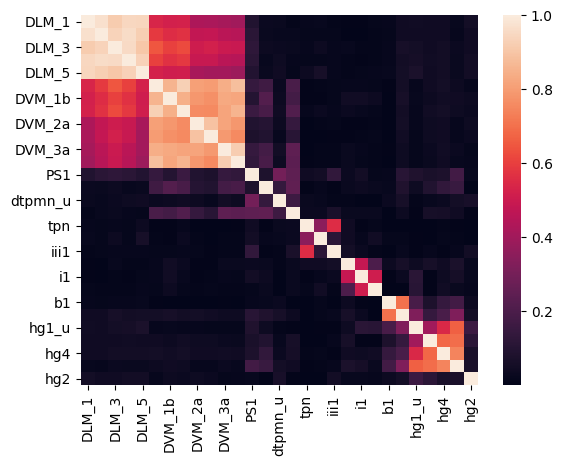

In [218]:
wing_simmat = cosine_similarity(wing_multi_df[clust_order].T)
wing_simmat = pd.DataFrame(data=wing_simmat, columns=clust_order, index=clust_order)
wing_long_simmat = pd.melt(wing_simmat.rename_axis('mn_1').reset_index(), id_vars='mn_1', value_vars=wing_simmat.columns).rename(columns={'variable':'mn_2'})

sns.heatmap(wing_simmat)

In [257]:
# similarity between DLMs and DVMs

# mn_1 = DLM, mn_2 = DVM. should be 35 pairwise comparisons
indir_sim = wing_long_simmat[wing_long_simmat.mn_1.str.startswith('DL') & wing_long_simmat.mn_2.str.startswith('DV')].reset_index(drop=True)

print("{} comparisons".format(
    len(indir_sim)))

print("{} \u00B1 {} average similarity".format(
    np.round(np.mean(indir_sim.value),3), np.round(np.std(indir_sim.value),3)))

35 comparisons
0.501 ± 0.069 average similarity


In [258]:
# similarity between tension MNs, 10 pairwise comparisons
tens_sim = wing_long_simmat[wing_long_simmat.mn_1.isin(tens_df.cell_type.to_list()) & wing_long_simmat.mn_2.isin(tens_df.cell_type.to_list())].reset_index(drop=True)
tens_sim = tens_sim[tens_sim.value < 0.9999].drop_duplicates(subset='value').reset_index(drop=True)

print("{} comparisons".format(
    len(tens_sim)))

print("{} \u00B1 {} average similarity".format(
    np.round(np.mean(tens_sim.value),3), np.round(np.std(tens_sim.value),3)))

10 comparisons
0.127 ± 0.101 average similarity


In [262]:
### module preference ###

# motor clusters
cluster_dict = {
"DLM_clu" : ['DLM_1','DLM_2','DLM_3','DLM_4','DLM_5'],
"DVM_clu" : ['DVM_1a','DVM_1b','DVM_1c','DVM_2a','DVM_2b','DVM_3a','DVM_3b'],
"tension_clu" : ['PS1','PS2','dtpmn_u','tp2'],
"steerA_clu" : ['tpn','iii1','iii3'],
"steerB_clu" : ['i2_u','i1','b3_u'],
"steerC_clu" : ['b2','b1'],
"steerD_clu" : ['hg1_u','hg3','hg4','iii4a_u'],
"hg2_clu" : ['hg2']
}
flat_wing_dict = {val:key for key, lst in cluster_dict.items() for val in lst}



In [272]:
# wing preference df
wing_properties_df['cluster'] = wing_properties_df.cell_type.map(flat_wing_dict)
properties_df = wing_properties_df.rename(columns={'MN_id':'post_pt_root_id'})
syn_df = wing_synapses_df.merge(wing_properties_df.rename(columns={'pt_root_id':'post_pt_root_id'})[['post_pt_root_id','cluster']])
adj = pd.crosstab(syn_df.pre_pt_root_id,syn_df.cluster)
wing_pref_df = pd.DataFrame(adj.sum(axis=1).reset_index(name='MN_syn'))
wing_pref_df = wing_pref_df.merge(pd.DataFrame(adj.max(axis=1).reset_index(name='top_syn')))
wing_pref_df['proportion'] = wing_pref_df.top_syn / wing_pref_df.MN_syn
wing_pref_df = wing_pref_df.merge(wing_multi_df.reset_index()[['pre_pt_root_id','classification_system']])

wing_pref_df.head()


,pre_pt_root_id,MN_syn,top_syn,proportion,classification_system
0,648518346459413252,39,38,0.974359,local
1,648518346459520004,263,138,0.524715,descending
2,648518346459550468,54,49,0.907407,local
3,648518346459573508,93,84,0.903226,local
4,648518346459589380,29,27,0.931034,local


In [275]:
# wing median preference score

print("wing median preference score, all premns: {}".format(
    np.round(np.median(wing_pref_df.proportion),3)))

wing median preference score, all premns: 0.829


In [ ]:
## TO DO: LEG MODULE PREFERENCE ## 

In [340]:
## hemilineage quantification ##

# what % of local+intersegmental neurons are typed?
wing_df = wing_multi_df[wing_multi_df.index.get_level_values(level='classification_system').str.startswith('l')].reset_index()
leg_df = flat_leg_multi[flat_leg_multi.index.get_level_values(level='cell_class').isin(['local','intersegmental'])].reset_index()
leg_df = leg_df.rename(columns={'segID':'pre_pt_root_id','NT':'putative_NT'})

merged_premns = pd.concat([wing_df[['pre_pt_root_id','cell_type']],leg_df[['pre_pt_root_id','cell_type']]]).drop_duplicates(subset='pre_pt_root_id')
merged_premns = merged_premns.replace(['unk3'], 'uk')
merged_premns.cell_type = merged_premns.cell_type.fillna('uk')

typed_premns = merged_premns[~merged_premns.cell_type.isin(['uk'])]

print("{} of {} premns typed: {}%".format(
    len(typed_premns), len(merged_premns), np.round(len(typed_premns)/len(merged_premns),3)*100))


1830 of 2115 premns typed: 86.5%


In [376]:
# what percent of synapses are typed?
trunc_leg_df = leg_df.iloc[:,5:].set_index('pre_pt_root_id')
trunc_wing_df = wing_df.set_index('pre_pt_root_id').iloc[:,5:-1]

trunc_leg_df_typed = trunc_leg_df[trunc_leg_df.index.isin(typed_premns.pre_pt_root_id.to_list())]
trunc_wing_df_typed = trunc_wing_df[trunc_wing_df.index.isin(typed_premns.pre_pt_root_id.to_list())]

print("{} of {} synapses typed: {}%".format(
    trunc_leg_df_typed.sum().sum()+trunc_wing_df_typed.sum().sum(), trunc_leg_df.sum().sum()+trunc_wing_df.sum().sum(), 
    np.round((trunc_leg_df_typed.sum().sum()+trunc_wing_df_typed.sum().sum()) / (trunc_leg_df.sum().sum()+trunc_wing_df.sum().sum()),3)*100))

257429 of 286316 synapses typed: 89.9%
